In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(dataset["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
dataset["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
dataset["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [8]:
# dataset["data"]

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
# creating pandas dataframe for input features
df_inputs = pd.DataFrame(dataset["data"],columns = dataset["feature_names"])
df_inputs
df_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
# creating dataframe for output/target class
df_output = pd.DataFrame(dataset["target"], columns = ["Class"])
df_output

,Class
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

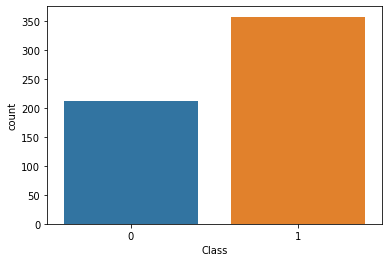

In [11]:
# Checking count of each target class
# 0: Malignant
# 1: Beningn
sns.countplot(df_output["Class"])

In [12]:
# splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_inputs, df_output["Class"], test_size = 0.30, random_state = 101)

In [13]:
# support vector classifier
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [14]:
predictions = model.predict(X_test)

## Creating dataframe to compare actual outputs and predicted outputs

In [15]:
compare = pd.DataFrame({"Actual": y_test, "Predicted": predictions})
compare

,Actual,Predicted
107,1,1
437,1,1
195,1,1
141,0,0
319,1,1
...,...,...
420,1,1
279,1,1
390,1,1
91,0,1


In [16]:
# model evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))

[[ 56  10]
 [  3 102]]


In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



## Hyper Parameter tuning using GridSearch

In [18]:
from sklearn.model_selection import GridSearchCV
# dictionary containing hyperparameters to be tuned and theirvalues to be tested
grid_parameters = {'C': [0.001, 0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}


In [20]:
# SVC() is estimator
# grid_parameters from above cell
# verbose set to greater than 1 to get the output messages, when the model is being tuned
grid = GridSearchCV(SVC(), grid_parameters, verbose = 3)

In [21]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END ..........................C=0.001, gamma=0.0001; total time=   0.0s
[CV 2/5] END ..........................C=0.001, gamma=0.0001; total time=   0.0s
[CV 3/5] END ..........................C=0.001, gamma=0.0001; total time=   0.0s
[CV 4/5] END ..........................C=0.001, gamma=0.0001; total time=   0.0s
[CV 5/5] END ..........................C=0.001, gamma=0.0001; total time=   0.0s
[CV 1/5] END ...........................C=0.001, gamma=0.001; total time=   0.0s
[CV 2/5] END ...........................C=0.001, gamma=0.001; total time=   0.0s
[CV 3/5] END ...........................C=0.001, gamma=0.001; total time=   0.0s
[CV 4/5] END ...........................C=0.001, gamma=0.001; total time=   0.0s
[CV 5/5] END ...........................C=0.001, gamma=0.001; total time=   0.0s
[CV 1/5] END ............................C=0.001, gamma=0.01; total time=   0.0s
[CV 2/5] END ............................C=0.00

[CV 5/5] END .................................C=1, gamma=100; total time=   0.0s
[CV 1/5] END .............................C=10, gamma=0.0001; total time=   0.0s
[CV 2/5] END .............................C=10, gamma=0.0001; total time=   0.0s
[CV 3/5] END .............................C=10, gamma=0.0001; total time=   0.0s
[CV 4/5] END .............................C=10, gamma=0.0001; total time=   0.0s
[CV 5/5] END .............................C=10, gamma=0.0001; total time=   0.0s
[CV 1/5] END ..............................C=10, gamma=0.001; total time=   0.0s
[CV 2/5] END ..............................C=10, gamma=0.001; total time=   0.0s
[CV 3/5] END ..............................C=10, gamma=0.001; total time=   0.0s
[CV 4/5] END ..............................C=10, gamma=0.001; total time=   0.0s
[CV 5/5] END ..............................C=10, gamma=0.001; total time=   0.0s
[CV 1/5] END ...............................C=10, gamma=0.01; total time=   0.0s
[CV 2/5] END ...............

[CV 4/5] END ..............................C=1000, gamma=100; total time=   0.0s
[CV 5/5] END ..............................C=1000, gamma=100; total time=   0.0s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             verbose=3)

In [22]:
# prediction usingt tuned model
grid_predictions = grid.predict(X_test)

In [23]:
print(confusion_matrix(y_test, grid_predictions))

[[ 59   7]
 [  4 101]]


In [24]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

